In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Welche Module?

Statistik ist ein sehr breites Feld. Daher gibt es nicht das eine Modul, für alle statistischen Bereiche und Anwendungen. Hier daher ein kurzer Überblick, welche Python Module es für welche Zwecke gibt.

- [SciPy](https://scipy.org/): Erste Anlaufstelle für einfachere Dinge: Wahrscheinlichkeitsfunktionen; Deskriptive, zusammenfassende Statistiken; einfache statistische Tests; 
- [Statsmodels](https://www.statsmodels.org/stable/index.html): erweiterte statistische Modelle und Tests
- [Pingouin](https://pingouin-stats.org/build/html/index.html): statistische Tests einfacher zu handhaben und mit mehr Output
- [SciKit-Learn](https://scikit-learn.org/stable/): Klassifikation, Regression, Clustering, Modell Selektion
- [PyMC](https://www.pymc.io/projects/docs/en/stable/learn.html): Bayesianische Statistik und Modellierung; probabilistisches Maschinelles Lernen

# Distributionen

SciPy weist eine enorme Bandbreite an [Wahrscheinlichkeitsverteilungen](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions) auf.

**Beispiel:**

Alle 12 Minuten kommt ein Bus. Was ist die Wahrscheinlichkeit, 7 Minuten oder weniger zu warten?

In [2]:
# uniform distribution

from scipy.stats import uniform

uniform.cdf(7, 0, 12)

0.5833333333333334

Was ist die Wahrscheinlichkeit, länger als 7 Minuten zu warten?

In [3]:
1 - uniform.cdf(7, 0, 12)

0.41666666666666663

Und die Wahrscheinlichkeit, zwischen 4 und 7 Minuten zu warten?

In [4]:
uniform.cdf(7, 0, 12) - uniform.cdf(4, 0, 12)

0.25000000000000006

Eine zufällige uniforme Verteilung erhält man mit der Methode `.rvs()`.

In [6]:
ufd = uniform.rvs(0, 5, size=15)

ufd

array([4.75791013, 2.07110249, 3.01989969, 4.62245853, 0.84355766,
       1.43304448, 4.55223013, 3.21069743, 0.78943212, 4.71571557,
       4.21856519, 4.49804084, 1.3266552 , 4.31083008, 0.46161331])

# Korrelationen

In [12]:
reslz_df = pd.read_csv("data/resilienz.csv", sep=";", decimal=",")

In [13]:
reslz_df = reslz_df.iloc[:, 1:]

In [14]:
reslz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bildungsabschluss  550 non-null    object 
 1   resilienz          550 non-null    float64
 2   sportverein        550 non-null    int64  
 3   stundenbewegung    550 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 17.3+ KB


In [17]:
reslz_df.head()

,bildungsabschluss,resilienz,sportverein,stundenbewegung
0,d) Gymnasium,0.084340,1,5
1,d) Gymnasium,-2.431638,1,1
2,d) Gymnasium,0.812406,1,3
3,d) Gymnasium,0.587592,0,0
4,d) Gymnasium,-1.966560,1,3


### normalverteilt?

In [48]:
bew = reslz_df["stundenbewegung"]
res = reslz_df["resilienz"]

In [49]:
print(len(bew))
print(len(res))

550
550


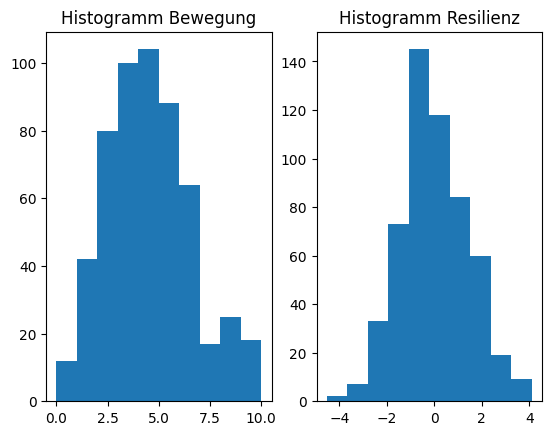

In [33]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(bew)
ax2.hist(res)

ax1.set_title("Histogramm Bewegung")
ax2.set_title("Histogramm Resilienz")

plt.show()

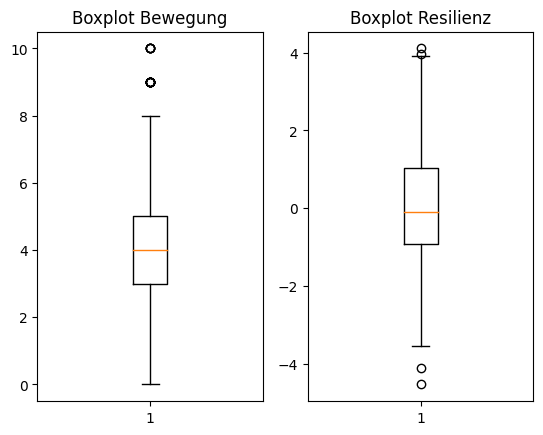

In [34]:
_, (ax1, ax2) = plt.subplots(1, 2)

ax1.boxplot(bew)
ax2.boxplot(res)

ax1.set_title("Boxplot Bewegung")
ax2.set_title("Boxplot Resilienz")

plt.show()

In [76]:
# Kolmogorov-Smirfnov Test

stat, p = stats.kstest(bew, "norm")
print(f"Bewegung  - Statistik: {stat}, P: {p}")

stat, p = stats.kstest(res, "norm")
print(f"Resilienz - Statistik: {stat}, P: {p}")

Bewegung  - Statistik: 0.8790680498700026, P: 0.0
Resilienz - Statistik: 0.09997260064690139, P: 3.080748230523634e-05


In [78]:
# Shapiro-Wilk Test

stat, p = stats.shapiro(bew)
print(f"Bewegung  - Statistik: {stat}, P: {p}")

stat, p = stats.shapiro(res)
print(f"Resilienz - Statistik: {stat}, P: {p}")

Bewegung  - Statistik: 0.9610379934310913, P: 6.845372879649148e-11
Resilienz - Statistik: 0.9969815611839294, P: 0.4034714996814728


## Korrelationen plotten

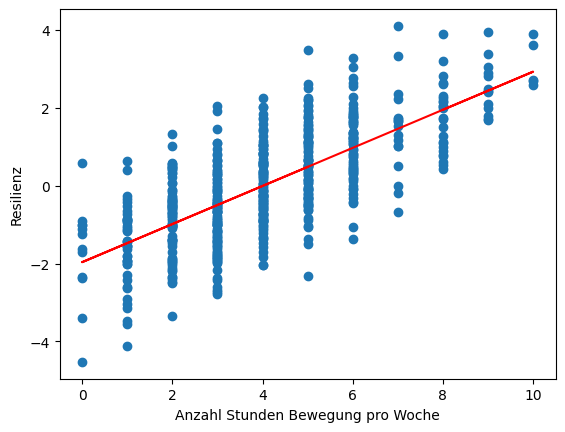

In [30]:
_, ax = plt.subplots()

ax.scatter(bew, res)

slope, intercept = np.polyfit(bew, res, 1) # I really don't know what the hell is going on here!!
ax.plot(bew, bew*slope+intercept, color="red")

ax.set_xlabel("Anzahl Stunden Bewegung pro Woche")
ax.set_ylabel("Resilienz")

plt.show()

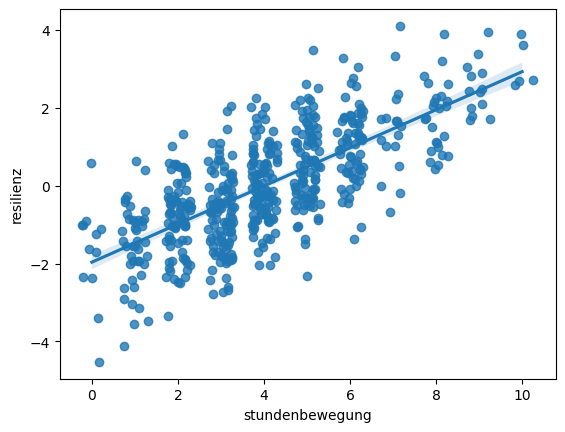

In [69]:
import seaborn as sns

sns.regplot(x=bew, y=res, x_jitter=0.3)
plt.show()

## verschiedene Korrelationskoeffizienten

In [35]:
bew.corr(res)

0.7162046913400608

In [59]:
result = stats.pearsonr(bew, res)
print(f"Koeff (Pearson): {result.statistic}, P: {result.pvalue}")

ci = result.confidence_interval(confidence_level=.95)
print(f"Konfidenzintervall zwischen {ci.low} und {ci.high}")

Koeff (Pearson): 0.716204691340061, P: 1.1801174971538847e-87
Konfidenzintervall zwischen 0.6728905096721732 und 0.7546246888551433


In [61]:
spear_corr, spear_p = stats.spearmanr(bew, res)
print(f"Koeff (Spearman): {spear_corr}, P: {spear_p}")

Koeff (Spearman): 0.7032192442866754, P: 3.162142463981536e-83


In [62]:
ken_corr, ken_p = stats.kendalltau(bew, res)
print(f"Koeff (Kendall): {ken_corr}, P: {ken_p}")

Koeff (Kendall): 0.5401725034867534, P: 8.143845857320777e-71


# Siginfikanztest

## T-Test

## ANOVA

# Lineare Regression